# Aviation Accident Database Data Analysis

## Introduction
The company is exploring the aviation industry and needs to assess the risks of operating aircraft. Using the data provided, the analysis will identify patterns in accidents, Injury severity and aircraft damage. Our main goal is to provide data-driven recommendations on the safest aircraft models to help guide purchase decision and minimise risk

Based on the goal of this project, and the data provided, the following are some key objectives I will cover:
1. To identify low risk aircraft models - I will analyze accident rates per aircraft model to determine which ones are statistically the safest. 
    - Key Data columns: 'Make', 'Model', 'Aircraft.Category'. I will identify number of accidents per model, and calculate it per operational year
2.  To examine factors contributing to these accidents. 
    - Key Data columns: 'Weather.Condition', 'Broad.phase.of.flight', 'Number.of.Engines', 'Engine.Type'  and compare them to 'Injury.Severity', 'Total.Fatal.Injuries', and 'Total.Serious.Injuries'
3. To assess the impact weather conditions have, to these accidents and/or incidents
    - Key Data columns: 'Weather.Condition', 'Event.Id'
4. To assess the safety of passangers based on Injuries
    - Key Data columns: 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', for each aircraft 'Model'
5. To evaluate aircraft Damage and Injuries
    - Key data columns: 'Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries'
6.  To track changes in accident frequency over time.
    - This will help us understand whether aviation safety has improved over the years
    - Key data columns: 'Event.Date', Event.Id'

## 1.0 Importing our Libraries

In [169]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## 1.1 Reading the Dataset from our CSV files

The two datasets contain information from 1948 to 2023 on civil accidents and selected incidents mostly within the United States, as well as state names and their abbreviations

* The link to the datasets is: [Link](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?select=USState_Codes.csv)

In [170]:
#To read the AviationData.csv file:
Aviation_data = pd.read_csv("AviationData.csv", encoding="latin1", low_memory=False)

#To open the USState_Code.csv file:
state_codes = pd.read_csv("USState_Codes.csv")



# 1.2 Prevewing our Datasets

In [171]:
#To inspect the first 5 rows of data in AviationData.csv:
Aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [172]:
#To inspect the first 5 rows of data in USState_Codes.csv:
state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## 1.3 Information about out Datasets

In [173]:
# To get more information about the characteristics of the datasets, i.e number of columns, rows, null values, etc
print(Aviation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [174]:
print(state_codes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


In [175]:
#To see all the columns in the dataset:
print(Aviation_data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [176]:
Aviation_data1 = Aviation_data.copy(deep=True)

## 1.4 Data Cleaning

### 1.4.a Check for Null Values

In [177]:
# This will show us the sum of null values per column
Aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [178]:
Aviation_data.shape

(88889, 31)

In [179]:
# Before removing columns with over 50% missing values, let's clean these columns first:
Aviation_data['Aircraft.Category'] = Aviation_data['Aircraft.Category'].fillna('Unknown')
Aviation_data.dropna(subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Make', 'Model'], inplace=True)

In [180]:
# For cleaner data, we will remove the columns with more than 50% missing values
Aviation_data.dropna(axis=1, thresh=len(Aviation_data) * 0.5, inplace=True)
Aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [181]:
Aviation_data.shape

(74739, 26)

In [182]:
# To drop columns that might not be useful to us:
Aviation_data.drop(columns=['Accident.Number', 'Publication.Date', 'Purpose.of.flight', 'Country', 'Investigation.Type', 'Amateur.Built','Airport.Name', 'Location', 'Number.of.Engines','Report.Status'], inplace=True)

Aviation_data.columns

Index(['Event.Id', 'Event.Date', 'Airport.Code', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [183]:
# to confirm whether the columns have been dropped:
Aviation_data.shape

(74739, 16)

In [184]:
Aviation_data['Make'] = Aviation_data['Make'].str.title()

In [185]:
Aviation_data['Injury.Severity'].unique()


array(['Fatal(2)', 'Fatal(4)', 'Fatal(1)', 'Non-Fatal', 'Fatal(3)',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(23)', 'Fatal(10)',
       'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)', 'Fatal(29)',
       'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(14)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(125)', 'Fatal(228)', 'Fatal(75)',
       'Fatal(104)', 'Fatal(229)', 'Fatal(80)', 'Fatal(88)', 'Fatal(

In [186]:

# Sample data
data = pd.Series(['Fatal(2)', 'Fatal(4)', 'Fatal(1)', 'Non-Fatal', 'Fatal(3)', 'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)', 'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(23)', 'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)', 'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(14)', 'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)', 'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)', 'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)', 'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)', 'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)', 'Fatal(230)', 'Fatal(97)', 'Fatal(125)', 'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal(80)', 'Fatal(88)', 'Fatal(19)', 'Fatal(60)', 'Fatal(113)', 'Fatal(143)', 'Fatal(83)', 'Fatal(138)', 'Fatal(102)', 'Fatal(115)', 'Fatal(141)', 'Fatal(46)', 'Fatal(45)', 'Fatal(107)', 'Fatal(124)', 'Fatal(49)', 'Fatal(96)', 'Fatal', np.nan, 'Minor', 'Serious'])

# Function to extract the base category
def extract_category(value):
    if pd.isna(value):
        return np.nan
    else:
        return value.split('(')[0].strip()

# Apply function to the column
cleaned_data = data.apply(extract_category)

# Create a DataFrame with the cleaned column
df = pd.DataFrame({'Injury.Severity': cleaned_data})

# View the unique values
print(df['Injury.Severity'].unique())

# Clean the 'Injury.Severity' column and apply it to our clean csv
Aviation_data['Injury.Severity'] = Aviation_data['Injury.Severity'].apply(extract_category)


['Fatal' 'Non-Fatal' 'Incident' 'Unavailable' nan 'Minor' 'Serious']


## 1.4.b Checking for duplicate data

In [187]:
# To check for duplicates, which can affect my data analysis:
Aviation_data.duplicated(subset=['Event.Id']).sum()

743

In [188]:
#Let us drop the duplicates, to get a cleaner dataset:
Aviation_data.drop_duplicates(subset=['Event.Id'], inplace=True)
Aviation_data.shape #this will show whether the 743 rows have been dropped

(73996, 16)

In [189]:
# To ensure that the dates can be useful for time analysis, we convert then to datetime format
Aviation_data['Event.Date'] = pd.to_datetime(Aviation_data['Event.Date'], errors='coerce')

# To split 'Event.Date' and add a column for 'Year':
Aviation_data['Year'] = pd.to_datetime(Aviation_data['Event.Date']).dt.strftime('%Y')


## 1.4.c Handling Outliers
To avoid outliers skewing our statistical analysis and deliver incorrect insights, we need to detect and handle them

In [190]:
# We will first handle the columns with numerical data:
Aviation_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Event.Date,73996,1998-12-20 11:51:26.242499584,1948-10-24 00:00:00,1987-10-10 18:00:00,1995-07-22 00:00:00,2011-07-10 06:00:00,2022-12-29 00:00:00,NaN
Total.Fatal.Injuries,73996.0,0.534975,0.0,0.0,0.0,0.0,295.0,4.603671
Total.Serious.Injuries,73996.0,0.258582,0.0,0.0,0.0,0.0,161.0,1.555107
Total.Minor.Injuries,73597.0,0.301439,0.0,0.0,0.0,0.0,171.0,1.565306
Total.Uninjured,73549.0,4.634081,0.0,0.0,1.0,2.0,576.0,25.252316


In [191]:
# To detect outliers:
Q1 = Aviation_data['Total.Fatal.Injuries'].quantile(0.25)
Q3 = Aviation_data['Total.Fatal.Injuries'].quantile(0.75)
IQR = Q3 - Q1
outliers = Aviation_data[(Aviation_data['Total.Fatal.Injuries']<(Q1 - 1.5 * IQR)) | (Aviation_data['Total.Fatal.Injuries']>(Q3 + 1.5 * IQR))]
outliers

,Event.Id,Event.Date,Airport.Code,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year
0,20001218X45444,1948-10-24,NaN,Fatal,Destroyed,Unknown,NC6404,Stinson,108-3,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,1948
1,20001218X45447,1962-07-19,NaN,Fatal,Destroyed,Unknown,N5069P,Piper,PA24-180,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,1962
3,20001218X45448,1977-06-19,NaN,Fatal,Destroyed,Unknown,N1168J,Rockwell,112,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,1977
4,20041105X01764,1979-08-02,NaN,Fatal,Destroyed,Unknown,N15NY,Cessna,501,NaN,1.0,2.0,NaN,0.0,VMC,Approach,1979
6,20001218X45446,1981-08-01,NaN,Fatal,Destroyed,Unknown,N4988E,Cessna,180,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88843,20221205106408,2022-12-04,CPT,Fatal,Destroyed,Airplane,N8149Z,Cessna,210-5(205),NaN,2.0,0.0,0.0,0.0,IMC,NaN,2022
88845,20221205106417,2022-12-05,CRZ,Fatal,Destroyed,Airplane,N99345,Engineering & Research,ERCOUPE 415-C,NaN,1.0,0.0,0.0,0.0,VMC,NaN,2022
88846,20221206106419,2022-12-05,RCE,Fatal,Destroyed,Airplane,N9142Q,Beech,F33A,NaN,3.0,0.0,0.0,0.0,VMC,NaN,2022
88868,20221213106451,2022-12-13,NaN,Fatal,NaN,Unknown,N74586,Mooney,M20B,NaN,1.0,0.0,0.0,0.0,NaN,NaN,2022


<Axes: ylabel='Total.Fatal.Injuries'>

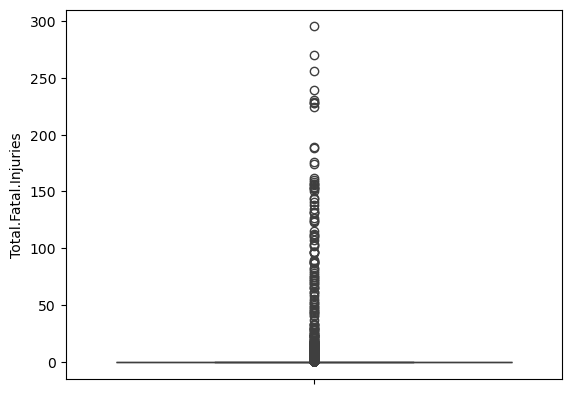

In [192]:
sns.boxplot(data=Aviation_data, y='Total.Fatal.Injuries')

In [193]:
Aviation_data.head()

,Event.Id,Event.Date,Airport.Code,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year
0,20001218X45444,1948-10-24,NaN,Fatal,Destroyed,Unknown,NC6404,Stinson,108-3,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,1948
1,20001218X45447,1962-07-19,NaN,Fatal,Destroyed,Unknown,N5069P,Piper,PA24-180,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,1962
3,20001218X45448,1977-06-19,NaN,Fatal,Destroyed,Unknown,N1168J,Rockwell,112,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,1977
4,20041105X01764,1979-08-02,NaN,Fatal,Destroyed,Unknown,N15NY,Cessna,501,NaN,1.0,2.0,NaN,0.0,VMC,Approach,1979
6,20001218X45446,1981-08-01,NaN,Fatal,Destroyed,Unknown,N4988E,Cessna,180,Reciprocating,4.0,0.0,0.0,0.0,IMC,Unknown,1981


# 1.5 Exploratory Data Analysis

### 1.5.a Checking for missing values

In [194]:
# For certain columns, filling missing values with 0 might make sense, especially if it means that the missing values meant the absence of an occurence
Aviation_data['Total.Uninjured'] = Aviation_data['Total.Uninjured'].fillna(0)
Aviation_data['Total.Fatal.Injuries'] = Aviation_data['Total.Fatal.Injuries'].fillna(0)
Aviation_data['Total.Minor.Injuries'] = Aviation_data['Total.Minor.Injuries'].fillna(0)
Aviation_data['Total.Serious.Injuries'] = Aviation_data['Total.Serious.Injuries'].fillna(0)

In [195]:
# Deciding on whether to drop 'Engine.Type', check for engine types being a duplicate in the make and model of the planes.- To see whether it's redundant
unique_combo = Aviation_data[['Make', 'Model', 'Engine.Type']].duplicated().sum()
print(unique_combo)

56779


In [196]:
# Fill Missing engine.type values with "unknown" for us to use it later
Aviation_data['Engine.Type'].fillna('unknown', inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_26380\2991694992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Aviation_data['Engine.Type'].fillna('unknown', inplace=True)


### 1.5.b Descriptive statistics

In [197]:
# To check the summary statistics for columns with numerical data:
print(Aviation_data.describe())

# To check frequency counts for categorical columns:
object_columns = ['Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Engine.Type', 'Weather.Condition', 'Broad.phase.of.flight']
for column in object_columns:
    print(Aviation_data['Injury.Severity'].value_counts())

                          Event.Date  Total.Fatal.Injuries  \
count                          73996          73996.000000   
mean   1998-12-20 11:51:26.242499584              0.534975   
min              1948-10-24 00:00:00              0.000000   
25%              1987-10-10 18:00:00              0.000000   
50%              1995-07-22 00:00:00              0.000000   
75%              2011-07-10 06:00:00              0.000000   
max              2022-12-29 00:00:00            295.000000   
std                              NaN              4.603671   

       Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  
count            73996.000000          73996.000000     73996.000000  
mean                 0.258582              0.299814         4.606087  
min                  0.000000              0.000000         0.000000  
25%                  0.000000              0.000000         0.000000  
50%                  0.000000              0.000000         1.000000  
75%            

### 1.6.c Groupby
This will help us summarize information

#### 1.6.c.1 Visializing groupby 'Aircraft.damage'
Assess the level of injuries based on how bad the airecraft was damaged

In [198]:
#Group by 'Aircraft.Damage'
damage_sum = Aviation_data.groupby('Aircraft.damage')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()
print(damage_sum)

                 Total.Fatal.Injuries  Total.Serious.Injuries  \
Aircraft.damage                                                 
Destroyed                     32332.0                  6487.0   
Minor                           106.0                   469.0   
Substantial                    6639.0                 10962.0   
Unknown                          56.0                    16.0   

                 Total.Minor.Injuries  Total.Uninjured  
Aircraft.damage                                         
Destroyed                      5145.0           6499.0  
Minor                          1228.0          87376.0  
Substantial                   14338.0         115240.0  
Unknown                          25.0            478.0  


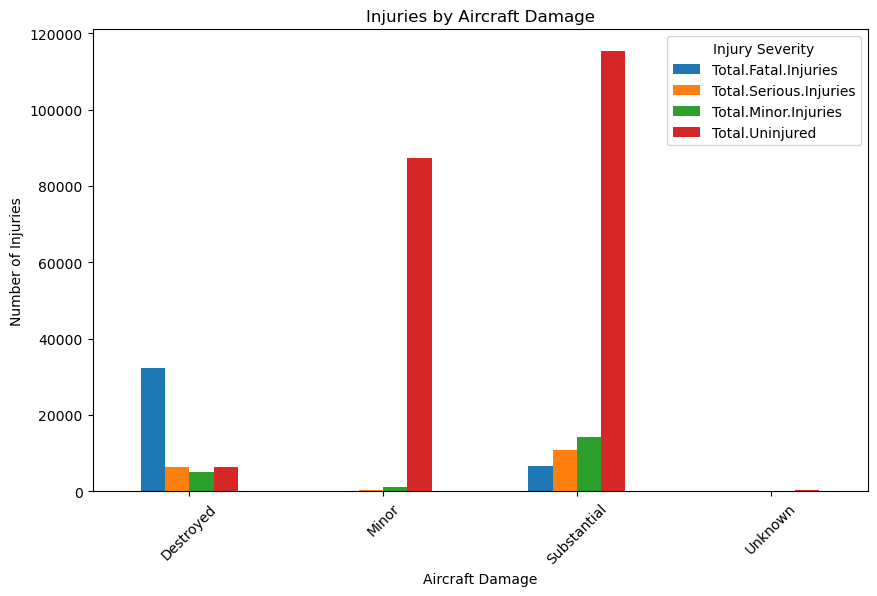

In [199]:
#Plotting a graph to show the relationship between injuries and aircraft damage:
damage_sum.plot(kind='bar', figsize=(10,6))
plt.title('Injuries by Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()

#### 1.6.c.2 Visualizing groupby 'Make' and 'Model'
Assess the level of injuries based on the model and make

In [200]:
# Group by make and model, count the number of events per aircraft model, and rename the count, with 'Incidents'
aircraft_events = Aviation_data.groupby(['Make','Aircraft.Category']).size().reset_index(name='Incidents')
print(aircraft_events)


                     Make Aircraft.Category  Incidents
0               177Mf Llc          Airplane          1
1              1St Ftr Gp           Unknown          1
2     2007 Savage Air Llc          Airplane          1
3             2021Fx3 Llc          Airplane          2
4                  3Xtrim          Airplane          1
...                   ...               ...        ...
6952        Zubair S Khan          Airplane          1
6953       Zuber Thomas P          Airplane          1
6954             Zukowski           Unknown          1
6955                Zwart           Unknown          1
6956     Zwicker Murray R          Airplane          1

[6957 rows x 3 columns]


In [201]:
Aviation_data['Total_Injured'] = Aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
make_model_injury = Aviation_data.groupby(['Model', 'Make', 'Aircraft.Category']).agg({
    'Total_Injured': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

print(make_model_injury.head())
print(" ")
print(make_model_injury.describe())

                Model                 Make Aircraft.Category  Total_Injured  \
0               &GCBC             Champion           Unknown            0.0   
1           (EX) RV-6                 Vans          Airplane            2.0   
2          (MODIFIED)  Eipper Quicksiver E           Unknown            1.0   
3  (SOLOY CONVERSION)          Bell 47G-3B        Helicopter            0.0   
4            -737-222               Boeing           Unknown          123.0   

   Total.Uninjured  
0              2.0  
1              0.0  
2              0.0  
3              1.0  
4              0.0  
 
       Total_Injured  Total.Uninjured
count   17167.000000     17167.000000
mean        4.712821        19.853906
std        26.357443       210.799404
min         0.000000         0.000000
25%         0.000000         0.000000
50%         1.000000         1.000000
75%         2.000000         3.000000
max      1763.000000     20390.000000


In [202]:
# Find the top 5 models and makes with the highest number of Total Injured
top_5_injured = make_model_injury.nlargest(5, 'Total_Injured')

# Print the top 5
print("Top 5 Models and Makes with the highest total injured:")
for index, row in top_5_injured.iterrows():
    print(f"Model: {row['Model']}, Make: {row['Make']}, Total Injured: {row['Total_Injured']}")

Top 5 Models and Makes with the highest total injured:
Model: 737, Make: Boeing, Total Injured: 1763.0
Model: 152, Make: Cessna, Total Injured: 724.0
Model: 737-200, Make: Boeing, Total Injured: 696.0
Model: PA-28-140, Make: Piper, Total Injured: 660.0
Model: 172N, Make: Cessna, Total Injured: 612.0


In [203]:
# Find the top 5 models and makes with the highest number of Total Uninjured
top_5_uninjured = make_model_injury.nlargest(5, 'Total.Uninjured')

# Print the top 5
print("Top 5 Models and Makes with the highest total uninjured:")
for index, row in top_5_uninjured.iterrows():
    print(f"Model: {row['Model']}, Make: {row['Make']}, Total Uninjured: {row['Total.Uninjured']}")

Top 5 Models and Makes with the highest total uninjured:
Model: 737, Make: Boeing, Total Uninjured: 20390.0
Model: 777, Make: Boeing, Total Uninjured: 8076.0
Model: DC-10-10, Make: Mcdonnell Douglas, Total Uninjured: 5548.0
Model: 767, Make: Boeing, Total Uninjured: 5130.0
Model: 737, Make: Boeing, Total Uninjured: 4572.0


### 1.6.c.2 Visualizing Groupby 'Weather.Condition' and 'Broad.phase.of.flight'

In [204]:
# Group by Weather.Condition and Broad.phase.of.flight and count incidents to help see whether the two are related
weather_phase_summary = Aviation_data.groupby(['Weather.Condition', 'Broad.phase.of.flight']).size().reset_index(name='Events')
print(weather_phase_summary)

   Weather.Condition Broad.phase.of.flight  Events
0                IMC              Approach     788
1                IMC                 Climb     230
2                IMC                Cruise    1379
3                IMC               Descent     180
4                IMC             Go-around     130
5                IMC               Landing     330
6                IMC           Maneuvering     362
7                IMC                 Other       2
8                IMC              Standing      19
9                IMC               Takeoff     368
10               IMC                  Taxi      44
11               IMC               Unknown      53
12               UNK              Approach      31
13               UNK                 Climb      21
14               UNK                Cruise     207
15               UNK               Descent      18
16               UNK             Go-around       3
17               UNK               Landing      52
18               UNK           

C:\Users\USER\AppData\Local\Temp\ipykernel_26380\4192228275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weather.Condition', y='Events', data=top5_weather, palette='Blues_d')


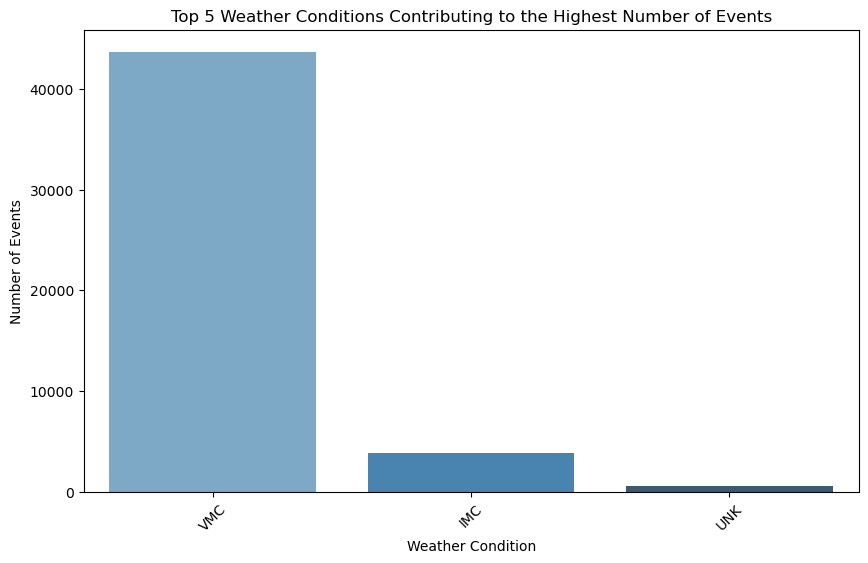

In [205]:
# Group by Weather.Condition and count the total events
weather_summary = weather_phase_summary.groupby('Weather.Condition')['Events'].sum().reset_index()

# Sort and select the top 5 weather conditions
top5_weather = weather_summary.sort_values(by='Events', ascending=False).head(5)

# Plot the top 5 weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather.Condition', y='Events', data=top5_weather, palette='Blues_d')
plt.title('Top 5 Weather Conditions Contributing to the Highest Number of Events')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

### 1.6.c.3 Visualizing Groupby 'Broad.phase.of.flight' and the number of events

C:\Users\USER\AppData\Local\Temp\ipykernel_26380\1347853230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Broad.phase.of.flight', y='Events', data=top5_phases, palette='Reds_d')


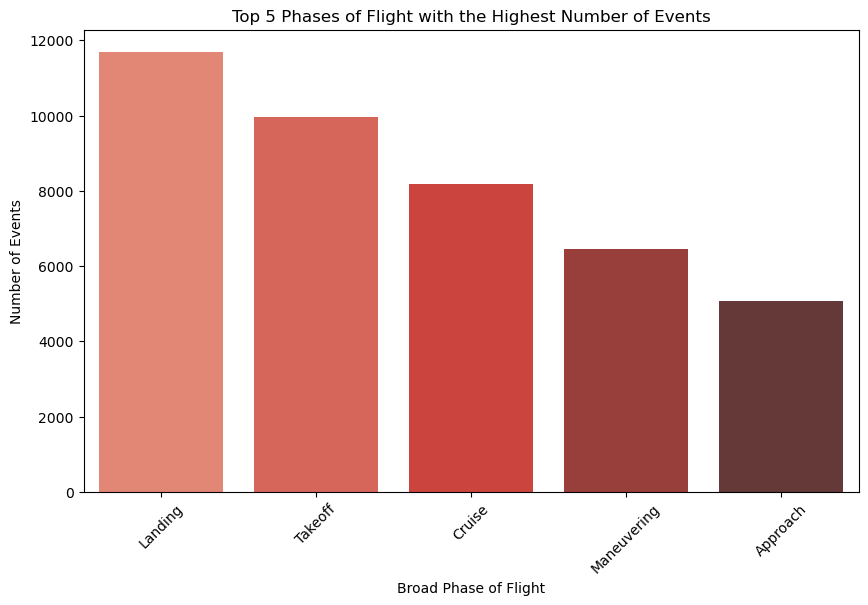

In [206]:
# Group by Broad.phase.of.flight and count the total events
phase_summary = weather_phase_summary.groupby('Broad.phase.of.flight')['Events'].sum().reset_index()

# Sort and select the top 5 phases of flight
top5_phases = phase_summary.sort_values(by='Events', ascending=False).head(5)

# Plot the top 5 broad phases of flight
plt.figure(figsize=(10, 6))
sns.barplot(x='Broad.phase.of.flight', y='Events', data=top5_phases, palette='Reds_d')
plt.title('Top 5 Phases of Flight with the Highest Number of Events')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()


### 1.6.c.4 Visualizing Groupby 'Year' and number of Incidents/events

In [207]:
# Group by Year and count the number of events each year
yearly_incidents = Aviation_data.groupby('Year').size().reset_index(name='Incidents')
print(yearly_incidents)

# Group by Year and sum up the total fatalities and serious injuries
yearly_summary = Aviation_data.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()
print(yearly_summary)

    Year  Incidents
0   1948          1
1   1962          1
2   1977          1
3   1979          1
4   1981          1
5   1982       3497
6   1983       3496
7   1984       3386
8   1985       3036
9   1986       2821
10  1987       2756
11  1988       2659
12  1989       2485
13  1990       2455
14  1991       2390
15  1992       2315
16  1993       2271
17  1994       2208
18  1995       2263
19  1996       2137
20  1997       2077
21  1998       2136
22  1999       2116
23  2000       2062
24  2001         56
25  2002         55
26  2003         82
27  2004         57
28  2005         63
29  2006         69
30  2007        151
31  2008       1887
32  2009       1770
33  2010       1778
34  2011       1842
35  2012       1819
36  2013       1557
37  2014       1534
38  2015       1581
39  2016       1663
40  2017       1638
41  2018       1681
42  2019       1624
43  2020       1392
44  2021       1545
45  2022       1581
    Year  Total.Fatal.Injuries  Total.Serious.Injuries
0   1

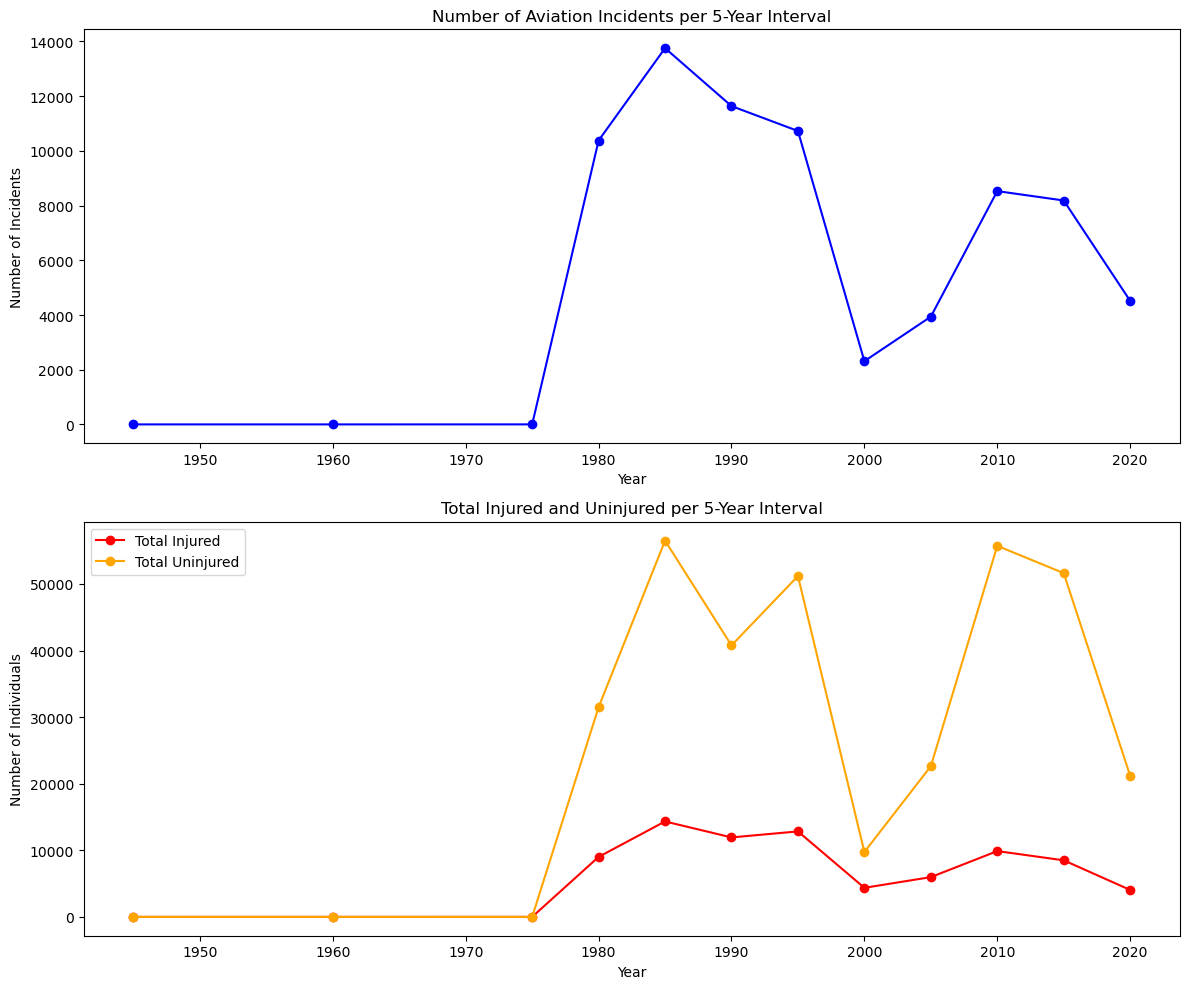

In [208]:
# Ensure 'Year' is an integer
Aviation_data['Year'] = pd.to_numeric(Aviation_data['Year'], errors='coerce')

# Create a new column for 5-year intervals
Aviation_data['Year_Group'] = (Aviation_data['Year'] // 5) * 5

# Group by Year_Group and count the number of events each interval
yearly_incidents = Aviation_data.groupby('Year_Group').size().reset_index(name='Incidents')

# Group by Year_Group and sum up the total injuries and uninjured
yearly_summary = Aviation_data.groupby('Year_Group')[['Total_Injured', 'Total.Uninjured']].sum().reset_index()

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for the number of incidents
ax1.plot(yearly_incidents['Year_Group'], yearly_incidents['Incidents'], marker='o', linestyle='-', color='b')
ax1.set_title('Number of Aviation Incidents per 5-Year Interval')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents')

# Plot for total injuries and uninjured
ax2.plot(yearly_summary['Year_Group'], yearly_summary['Total_Injured'], marker='o', linestyle='-', color='r', label='Total Injured')
ax2.plot(yearly_summary['Year_Group'], yearly_summary['Total.Uninjured'], marker='o', linestyle='-', color='orange', label='Total Uninjured')
ax2.set_title('Total Injured and Uninjured per 5-Year Interval')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Individuals')
ax2.legend()

plt.tight_layout()
plt.show()

In [209]:
Aviation_data.to_csv('AviationData_clean.csv', index=False)

## Conclusion
Based on my analysis, we've been able to identify trends in the aircraft risk factors, including injury severity, accident frequency as well as other external factors. Our analysis highlights three main recommendations, ie:
1. prioritize aircraft with low accident and injury records
2. Avoid makes and/or models associated with severe accidents under specific weather conditions
3. Focus on operational safety improvements for higher-risk models